 # Example 3 (Positive Feedback)

## Packages

In [4]:
using IntervalArithmetic, Plots, LaTeXStrings

In [5]:
#plotly() # for zoom
gr() # to export

Plots.GRBackend()

# Algorithm 4F [Subdivision + Contraction + Filter]

Solution may exist.
Solution may exist.


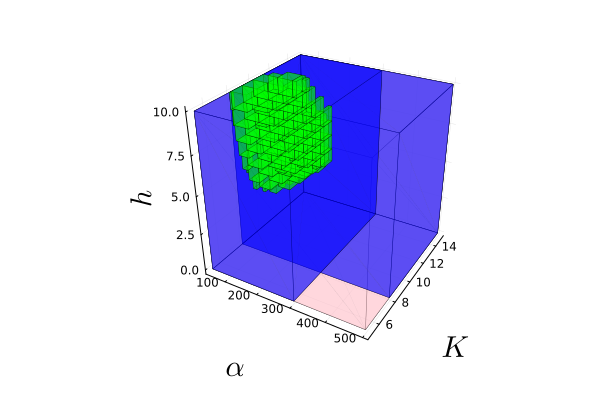

In [ ]:
begin
    
    local f(x, α, k, h, γ) = α/(1+(k/x)^h) - γ*x;
    
    # Desired steady state interval
    local Xss = [Interval(7, 8), Interval(100, 101)];

    # Initial parameter sets
    local A0 = Interval(50, 500);
    local Γ = Interval(0.5, 1.5); # Fixed for the 3D plot
    local K0 = Interval(5, 15);
    local H0 = Interval(0, 10);

    # Initialize variables
    local B0, C0, D0, E0, F0, y;
    local B1, C1, D1, E1, F1;
    local A1, K1, H1;
    
    # Initial box
    local P0 = IntervalBox(A0, K0, H0);
    
    # Initialize plot
    local plt = plot(xlabel = L"\alpha", ylabel = L"K", zlabel = L"h", tickfontsize = 8,  guidefontsize = 20);
    plt = plot3D(P0..., "pink");

    # Specify tolerance
    local tolerance = 0.01;
    
    # Initialize solution variable
    Solution = [];
    Pset = []
    Pset1 = []
    
    for xs in Xss

        Xd = xs 

        # Contractor
        # Forward
        B0 = K0 / Xd;
        C0 = B0 ^ H0;
        D0 = 1 + C0;
        E0 = A0 / D0;
        F0 = Γ * Xd;
        y = E0 - F0;
        # Constraint
        y = y ∩ (0..0);
        # Backward
        F1 = (E0 - y) ∩ F0;
        E1 = (y + F0) ∩ E0;
        D1 = (A0 / E1) ∩ D0;
        A1 = (E1 * D0) ∩ A0;
        C1 = (D1 - 1) ∩ C0;
        B1 = (C1 ^ (1/H0)) ∩ B0;
        H1 = (log(C1) / log(B0)) ∩ H0;
        K1 = (B1 * Xd) ∩ K0;

        # Box at first iteration
        P1 = IntervalBox(A1, K1, H1);

        push!(Pset, P1)

        P1ss = P1
        
        # Plot
        plt = plot3D(P1..., "blue");
        
        # Existence of a solution can be determined
        if isempty(P1)
        println("Solution does not exist.");
        else
            println("Solution may exist.");
        
    
            # Parameter subdivided, m times in each direction
            local m = 10;
            local P1m = mince(P0, m);
            local A0m, K0m, H0m;
            local A1m, K1m, H1m;
            local B0m, C0m, D0m, E0m, F0m, ym;
            local B1m, C1m, D1m, E1m, F1m;
            local Pold, Pnew;

            Pss1 = []

            for i in 1:length(P1m)

                Pold = P1m[i]; 
                
                while true
                #0 ∈ f(Xd × Pold × Γ...) # Using a bisection like condition to rule out grids

                    A0m, K0m, H0m = Pold;
                
                    # Contractor
                    # Forward
                    B0m = K0m / Xd;
                    C0m = B0m ^ H0m;
                    D0m = 1 + C0m;
                    E0m = A0m / D0m;
                    F0m = Γ * Xd;
                    ym = E0m - F0m;
                    # Constraint
                    ym = ym ∩ (0..0);
                    # Backward
                    F1m = (E0m - ym) ∩ F0m;
                    E1m = (ym + F0m) ∩ E0m;
                    D1m = (A0m / E1m) ∩ D0m;
                    A1m = (E1m * D0m) ∩ A0m;
                    C1m = (D1m - 1) ∩ C0m;
                    B1m = (C1m ^ (1/H0m)) ∩ B0m;
                    H1m = (log(C1m) / log(B0m)) ∩ H0m;
                    K1m = (B1m * Xd) ∩ K0m;

                    Pnew = IntervalBox(A1m, K1m, H1m);

                    # Break if parameter grid is not empty
                    if isempty(Pnew)
                        
                        break;

                    end

                    # Break if there is not much change in P
                    if prod(diam.(Pnew))/prod(diam.(Pold)) > 1 - tolerance

                        break;

                    end

                    Pold = Pnew;

                end
                
                push!(Pss1, Pnew); # save

            end

        end

        push!(Pset1, Pss1)
        
    end

    for i in 1:length(Pset1[1])

        plt = plot3D((Pset1[1][i] ∩ Pset1[2][i])..., "lime");

    end

    display(plt);

    #savefig(plt, "Ex3_CSF.pdf");
    
end

*A function to plot in 3D.*

In [16]:
function plot3D(A, B, C, clr::String)
# A, B, C are the intervals in the three directions.
    
    #@show clr
    
    # These are the vertices of the cube
    xp = [A.lo, A.lo, A.lo, A.lo, A.hi, A.hi, A.hi, A.hi]
    yp = [B.lo, B.hi, B.lo, B.hi, B.lo, B.lo, B.hi, B.hi]
    zp = [C.lo, C.lo, C.hi, C.hi, C.hi, C.lo, C.lo, C.hi]
    
    # These are their connections
    connections = [(1,2,3), (4,2,3), (4,7,8), (7,5,6), (2,4,7), (1,6,2), (2,7,6), (7,8,5), (4,8,5), (4,5,3), (1,6,3), (6,3,5)]

    # Edges
    xe = [A.lo, A.hi, A.hi, A.lo, A.lo, A.lo, A.lo, A.lo, A.lo, A.lo, A.hi, A.hi, A.hi, A.hi, A.hi, A.hi, A.lo]
    ye = [B.lo, B.lo, B.lo, B.lo, B.lo, B.hi, B.hi, B.lo, B.lo, B.hi, B.hi, B.lo, B.hi, B.hi, B.lo, B.hi, B.hi]
    ze = [C.lo, C.lo, C.hi, C.hi, C.lo, C.lo, C.hi, C.hi, C.lo, C.lo, C.lo, C.lo, C.lo, C.hi, C.hi, C.hi, C.hi]

    plot!(xe, ye, ze; lc=:black, lw=0.5, label=false)
    mesh3d!(xp, yp, zp; connections, proj_type=:persp, lc=:black, fc=clr, fa=0.4, lw=0, label=false);

end

plot3D (generic function with 1 method)